In [87]:
import music21 as m21

import pandas as pd
import numpy as np

import copy
import cPickle

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
f = open('bach.p', 'rb')
bach_df = cPickle.load(f)
f.close()

In [3]:
bach_df.head()

,BWV,orig_key,beats_per_measure,forward_note,back_note,forward_measure,back_measure,note_in_measure_position,quarter_in_measure_position,soprano,alto,tenor,bass
bwv421_0,bwv421,a minor,4,0,159,0,10,1,4,<music21.note.Note G>,<music21.note.Note D>,<music21.note.Note B->,<music21.note.Note G>
bwv421_1,bwv421,a minor,4,1,158,0,10,2,4,<music21.note.Note G>,<music21.note.Note D>,<music21.note.Note B->,<music21.note.Note G>
bwv421_2,bwv421,a minor,4,2,157,0,10,3,4,<music21.note.Note G>,<music21.note.Note D>,<music21.note.Note C>,<music21.note.Note A>
bwv421_3,bwv421,a minor,4,3,156,0,10,4,4,<music21.note.Note G>,<music21.note.Note D>,<music21.note.Note C>,<music21.note.Note A>
bwv421_4,bwv421,a minor,4,4,155,1,9,1,1,<music21.note.Note G>,<music21.note.Note D>,<music21.note.Note D>,<music21.note.Note B->


In [16]:
# a function that determines what 'pitch number' each pitch is.  
# this uses the basis that G4 = 1. I am using G4 because I want to
# make all bach chorales be in the key of G

def define_pitch_number(a_note):
    if type(a_note) == m21.note.Note:
    
        # identify how far the pitch is from G4
        interval_from_G4 = m21.interval.Interval(
                                noteStart= m21.note.Note('G4'), 
                                noteEnd  = a_note)

        # return this interval in terms of number of half steps
        pitch_offset = interval_from_G4.semitones

        # the new pitch number is relative to G4 = 100
        # so offset it by the pitch offset
        new_pitch_number = 1 + pitch_offset
        
    else:
        new_pitch_number = 1000000
    
    return new_pitch_number

In [11]:
# make a function to turn a note into a pitch category - ie. 'G4'
# input is a df
# no output; it changes the df
def create_cat_pitch_vars(df):
    
    for column in ['soprano', 'alto','tenor', 'bass']:
        a_list  = df[column].tolist()
        
        # create categorical pitch column
        cat_col_name = column + '_pitch_cat'
        
        # map using note pitch data
        df[cat_col_name] = [x.pitch.nameWithOctave if type(x) == m21.note.Note else 'Rest' for x in a_list]
        #.pitch.nameWithOctave)
#         print column, cat_col_name, df.loc[:,column][0]
         
    return df
    

In [17]:
# make a function to turn a note into a pitch category - ie. 'G4'
# input is a df
# no output; it changes the df
def create_cont_pitch_vars(df):
    for column in ['soprano', 'alto','tenor', 'bass']:
        a_list = df[column]
        
        # create continuous pitch column
        cont_col_name = column + '_pitch_cont'

        df[cont_col_name] = [define_pitch_number(x) for x in a_list]

    return df

In [12]:
bach_df = create_cat_pitch_vars(bach_df)

In [14]:
bach_df[bach_df['soprano_pitch_cat']=='Rest']
# looking good

,BWV,orig_key,beats_per_measure,forward_note,back_note,forward_measure,back_measure,note_in_measure_position,quarter_in_measure_position,soprano,alto,tenor,bass,soprano_pitch_cat,alto_pitch_cat,tenor_pitch_cat,bass_pitch_cat
bwv346_76,bwv346,C major,4,76,167,5,10,9,3,<music21.note.Rest rest>,<music21.note.Rest rest>,<music21.note.Rest rest>,<music21.note.Rest rest>,Rest,Rest,Rest,Rest
bwv346_77,bwv346,C major,4,77,166,5,10,10,3,<music21.note.Rest rest>,<music21.note.Rest rest>,<music21.note.Rest rest>,<music21.note.Rest rest>,Rest,Rest,Rest,Rest
bwv346_78,bwv346,C major,4,78,165,5,10,11,3,<music21.note.Rest rest>,<music21.note.Rest rest>,<music21.note.Rest rest>,<music21.note.Rest rest>,Rest,Rest,Rest,Rest
bwv346_79,bwv346,C major,4,79,164,5,10,12,3,<music21.note.Rest rest>,<music21.note.Rest rest>,<music21.note.Rest rest>,<music21.note.Rest rest>,Rest,Rest,Rest,Rest
bwv346_124,bwv346,C major,4,124,119,8,7,9,3,<music21.note.Rest rest>,<music21.note.Rest rest>,<music21.note.Rest rest>,<music21.note.Rest rest>,Rest,Rest,Rest,Rest
bwv346_125,bwv346,C major,4,125,118,8,7,10,3,<music21.note.Rest rest>,<music21.note.Rest rest>,<music21.note.Rest rest>,<music21.note.Rest rest>,Rest,Rest,Rest,Rest
bwv346_126,bwv346,C major,4,126,117,8,7,11,3,<music21.note.Rest rest>,<music21.note.Rest rest>,<music21.note.Rest rest>,<music21.note.Rest rest>,Rest,Rest,Rest,Rest
bwv346_127,bwv346,C major,4,127,116,8,7,12,3,<music21.note.Rest rest>,<music21.note.Rest rest>,<music21.note.Rest rest>,<music21.note.Rest rest>,Rest,Rest,Rest,Rest
bwv341_44,bwv341,g minor,4,44,99,3,6,9,3,<music21.note.Rest rest>,<music21.note.Rest rest>,<music21.note.Rest rest>,<music21.note.Rest rest>,Rest,Rest,Rest,Rest
bwv341_45,bwv341,g minor,4,45,98,3,6,10,3,<music21.note.Rest rest>,<music21.note.Rest rest>,<music21.note.Rest rest>,<music21.note.Rest rest>,Rest,Rest,Rest,Rest


In [18]:
bach_df = create_cont_pitch_vars(bach_df)

In [23]:
bach_df.head()

,BWV,orig_key,beats_per_measure,forward_note,back_note,forward_measure,back_measure,note_in_measure_position,quarter_in_measure_position,soprano,...,tenor,bass,soprano_pitch_cat,alto_pitch_cat,tenor_pitch_cat,bass_pitch_cat,soprano_pitch_cont,alto_pitch_cont,tenor_pitch_cont,bass_pitch_cont
bwv421_0,bwv421,a minor,4,0,159,0,10,1,4,<music21.note.Note G>,...,<music21.note.Note B->,<music21.note.Note G>,G4,D4,B-3,G2,1,-4,-8,-23
bwv421_1,bwv421,a minor,4,1,158,0,10,2,4,<music21.note.Note G>,...,<music21.note.Note B->,<music21.note.Note G>,G4,D4,B-3,G2,1,-4,-8,-23
bwv421_2,bwv421,a minor,4,2,157,0,10,3,4,<music21.note.Note G>,...,<music21.note.Note C>,<music21.note.Note A>,G4,D4,C4,A2,1,-4,-6,-21
bwv421_3,bwv421,a minor,4,3,156,0,10,4,4,<music21.note.Note G>,...,<music21.note.Note C>,<music21.note.Note A>,G4,D4,C4,A2,1,-4,-6,-21
bwv421_4,bwv421,a minor,4,4,155,1,9,1,1,<music21.note.Note G>,...,<music21.note.Note D>,<music21.note.Note B->,G4,D4,D4,B-2,1,-4,-4,-20


![](../presentation/yay_gifs/dwight.gif)

In [22]:
bach_df.describe()


,beats_per_measure,forward_note,back_note,forward_measure,back_measure,note_in_measure_position,quarter_in_measure_position,soprano_pitch_cont,alto_pitch_cont,tenor_pitch_cont,bass_pitch_cont
count,46676.000000,46676.00000,46676.00000,46676.000000,46676.000000,46676.000000,46676.00000,46676.000000,46676.000000,46676.000000,46676.000000
mean,3.860828,165.51474,165.51474,11.208501,10.550947,8.098766,2.42960,11316.981554,11825.955737,12034.797498,12368.615134
std,0.346130,190.88104,190.88104,12.216570,12.216967,4.534788,1.10032,105755.325612,108104.594504,109068.178743,110591.669100
min,3.000000,0.00000,0.00000,0.000000,0.000000,1.000000,1.00000,-8.000000,-13.000000,-18.000000,-32.000000
25%,4.000000,63.00000,63.00000,4.000000,4.000000,4.000000,1.00000,1.000000,-4.000000,-9.000000,-18.000000
50%,4.000000,127.00000,127.00000,9.000000,8.000000,8.000000,2.00000,5.000000,0.000000,-6.000000,-15.000000
75%,4.000000,204.00000,204.00000,14.000000,13.000000,12.000000,3.00000,8.000000,3.000000,-3.000000,-11.000000
max,4.000000,1699.00000,1699.00000,106.000000,106.000000,40.000000,10.00000,1000000.000000,1000000.000000,1000000.000000,1000000.000000


In [25]:
f = open('complete_bach.p','wb')
cPickle.dump(bach_df, f)
f.close()

In [28]:
clean_bach = bach_df.drop(['soprano','alto','tenor','bass'], axis=1)

In [29]:
f = open('clean_bach.p','wb')
cPickle.dump(clean_bach, f)
f.close()

## Data Visualizations

In [ ]:
# create a histogram of the frequency of notes by part
# x-axis is all pitches, lined up. you can set it using the continuous
# variables but label them with categorical. y is the # of times they
# show up. use different colors for each voice part

In [ ]:
# can i show a histogram that shows frequency of pitches by CHORD?
# ie I chord vs V chord vs IV chord?

### let's look at what our baseline is going to be. for every combination of the three parts alto, tenor, and bass, what are the possible soprano options and how likely are they relative to each other?


In [204]:
# each value is the alto-tenor-bass combined into one variable
three_parts = clean_bach[['alto_pitch_cat','tenor_pitch_cat',
           'bass_pitch_cat']].apply(lambda x: x[0]+x[1]+x[2], axis=1)

three_parts.head(2)

bwv421_0    D4B-3G2
bwv421_1    D4B-3G2
dtype: object

In [202]:
# combine the sop and other parts together into one df
# there are 46676 notes in total

combos = pd.concat([clean_bach[['soprano_pitch_cat']],three_parts], axis=1)
combos.columns = ['soprano_pitch_cat','other_parts']
print combos.shape
combos.head(2)

(46676, 2)


,soprano_pitch_cat,other_parts
bwv421_0,G4,D4B-3G2
bwv421_1,G4,D4B-3G2


In [317]:
j = combos.groupby(['other_parts'])
j

In [305]:
combos.groupby(['other_parts', 'soprano_pitch_cat']).apply(len)

other_parts   soprano_pitch_cat
A#4C#4F#3     F#5                    4
A-3C3F2       E-4                    2
              F4                     2
A-3D3B1       D4                     2
A-3F3B-2      D4                     2
A-3F3D3       B3                     2
A-3F3F3       C4                     4
A-4B3F3       D5                     2
A-4C4D3       F5                     2
A-4C4F3       D5                     6
A-4E-4F3      C5                     2
A-4F3D3       B-4                    2
A-4F4B-2      D5                     8
A-4F4B-3      D5                     6
A-4F4B3       D5                     6
A-4F4C3       D5                     2
A-4F4D3       F5                     2
A-4F4F3       C5                     4
A3A3C#3       E4                     4
              F#4                    4
A3A3C3        D4                     1
              E-4                    4
              F#4                    4
A3A3D3        F#4                    4
A3A3F#2       D4                

In [205]:
# if we group by the 46676 notes by the two columns, we can count the number of times that 
# sop/other-parts combo comes up.

# the goal is to come up wtih some number that describes the baseline - actually something
# a little differnet than baseline - describe how often am i actually arleady giving the 
# machine the answer since tehre is only ever one sop-ATB combo for that ATB?
# 

n_sop_parts_combos = combos.groupby(['other_parts', 'soprano_pitch_cat']).agg(len).reset_index()
n_sop_parts_combos.rename(columns={0:'this_SATB_combo_count'}, inplace=True)
print n_sop_parts_combos.shape
n_sop_parts_combos.head()

(3862, 3)


,other_parts,soprano_pitch_cat,this_SATB_combo_count
0,A#4C#4F#3,F#5,4
1,A-3C3F2,E-4,2
2,A-3C3F2,F4,2
3,A-3D3B1,D4,2
4,A-3F3B-2,D4,2


In [213]:
# this is the number of distinct SATB combos there are for every ATB.
# ie. if value=1, then that ATB is only matched with ONE sop.
# ie. if value=3, then that ATN is matched with THREE sopranos

other_parts_count = n_sop_parts_combos['other_parts'].value_counts()
print other_parts_count.sum()
other_parts_count = pd.DataFrame(other_parts_count)
print other_parts_count.head()
print other_parts_count.tail()


3862
         other_parts
G4D4E3             9
A4D4G3             9
C4A3A2             9
G4D4D3             9
D4B-3G2            8
         other_parts
E5E4B3             1
C4G3A-2            1
B-3F4A3            1
G4A3E-3            1
B4F#4D3            1


In [211]:
# other parts count EXCLUDING THOSE ATBs THAT ARE ONLY MATCHED WITH *ONE* SOP

# this means that 2807 out of the 3862 S-ATB combos, or 73%, are NOT obvious answers.

print other_parts_count[other_parts_count>1].sum()
other_parts_count[other_parts_count>1]

2807


G4D4E3      9
A4D4G3      9
C4A3A2      9
G4D4D3      9
D4B-3G2     8
D4A3A2      8
D4A3F#3     8
F4C4D3      8
E4C4C3      8
B4D4G3      8
F4A3D3      8
E4A3D3      8
D4A3D3      8
E4G3C3      8
G4D4A3      8
A4D4D3      8
G4D4C3      8
G4D4B3      8
A4E-4C4     8
A4D4A3      8
G4E4C4      8
F4B-3D3     7
G4C4C3      7
F4D4D3      7
D4B-3B-2    7
C4G3A2      7
C4G3D3      7
F4C4A3      7
D4A3G2      7
D5G4B3      7
           ..
A4G4A2      2
F4G3E3      2
G4G3G2      2
G4B3A3      2
F#4C#4A3    2
C5F#4C4     2
A4D4F#2     2
G3E-3E-2    2
A4B3F#3     2
B4G4B3      2
G4E-4G2     2
D4G4G3      2
B4C#4A3     2
B-3E3G2     2
E5A4F#3     2
D4B3A3      2
A4C4B2      2
D4B3E3      2
E5A4C#3     2
G3C4C3      2
E4B-3C#3    2
B4A4G3      2
E-4E-4C3    2
B3G3E2      2
D4D4G3      2
G4E-4B-2    2
A4F#4B3     2
A4G4E3      2
E-4A3A2     2
E4C4G2      2
Name: other_parts, dtype: int64

In [318]:
temp.to_csv('temptest.csv')

In [214]:
# ok well let's look at how many of the notes that I fed into the model were
# based on ATB bases that were easy to predict (ie they only had one option)

themerged = pd.merge(temp, other_parts_count, how='inner', left_on='other_parts',
        right_index=True)
themerged.head()

,other_parts,other_parts_x,other_parts_y


In [188]:
print themerged[themerged['other_parts_y']>1].head()
pooh = themerged[themerged['other_parts_y']>1][0]
print pooh.head()
np.sum(pooh)

# This is the number of notes where there is more than one soprano note
# for the given three lower parts

   other_parts other_parts_x soprano_pitch_cat  0  other_parts_y
1      A-3C3F2       A-3C3F2               E-4  2              2
2      A-3C3F2       A-3C3F2                F4  2              2
18     A3A3C#3       A3A3C#3                E4  4              2
19     A3A3C#3       A3A3C#3               F#4  4              2
20      A3A3C3        A3A3C3                D4  1              3
1     2
2     2
18    4
19    4
20    1
Name: 0, dtype: int64


42346

In [127]:
top_15_lower_parts = top_15_lower_parts['other_parts'].head(15)    
top_15_lower_parts

908           D4B3G2
1458         F#4D4D3
1816          G4D4G3
1382         F#4A3D3
909           D4B3G3
154          A4D4F#3
962          D4F#3D3
890          D4B-3G2
1815          G4D4G2
1914    RestRestRest
863           D4A3D3
891          D4B-3G3
1806          G4D4D3
1431         F#4C4D3
207          A4F#4D3
Name: other_parts, dtype: object

In [138]:
top_15_df = combos[combos['other_parts'].isin(top_15_lower_parts)]
print type(top_15_df)
top_15_df = top_15_df.groupby(['other_parts', 'soprano_pitch_cat']).agg(len)
# top_15_df#.reset_index()
# top_15_df.rename(columns={'0':'count'}, inplace=True)

<class 'pandas.core.frame.DataFrame'>


In [194]:
top_15_df['A4D4F#3']


soprano_pitch_cat
A4     100
A5       4
B-4      2
C5     197
D5     309
E5       2
F#5     12
dtype: int64

<Container object of 7 artists>

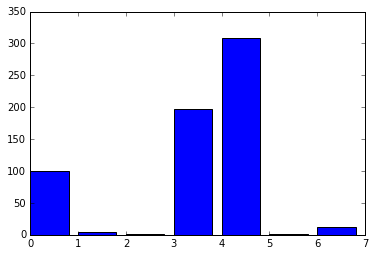

In [198]:
plt.bar(range(7),top_15_df['A4D4F#3'])

(array([ 2.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([  1. ,   3.3,   5.6,   7.9,  10.2,  12.5,  14.8,  17.1,  19.4,
         21.7,  24. ]),
 <a list of 10 Patch objects>)

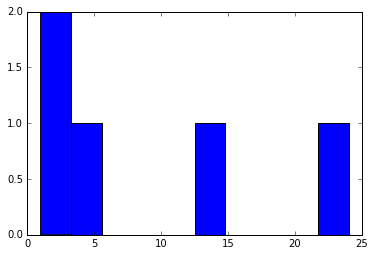

In [197]:
test = [1,2,3,4,5]
testy = [1, 13, 24, 4,2]
plt.hist(testy)

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: Tried to set a label via parameter 'x' in func 'hist' but couldn't find such an argument. 
(This is a programming error, please report to the matplotlib list!)
  from ipykernel import kernelapp as app


TypeError: hist() takes at least 2 arguments (1 given)

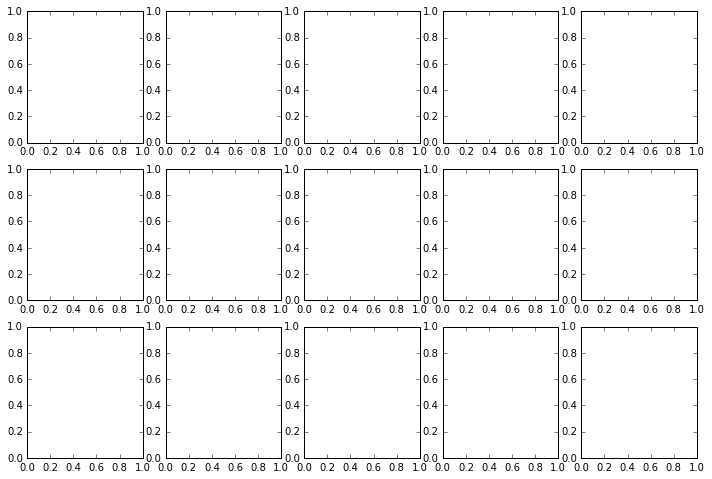

In [94]:
fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(12,8))
ax[0,0].hist(top_15_df[top_15_df['other_parts']=='A4D4F#3'])

playing around to turn the probabilities back into useable data

In [218]:
array_prob = np.array([  6.88703135e-02,   1.30499262e-04,   1.53048852e-04,
         3.37700546e-01,   4.67528225e-05,   1.04957559e-04,
         1.18073970e-02,   3.31345887e-04,   5.53379214e-05,
         2.52068421e-04,   1.69041276e-03,   7.56926909e-02,
         2.60156357e-05,   5.67174175e-05,   1.30388059e-06,
         1.21394522e-03,   3.65850516e-03,   4.77104622e-05,
         1.81129333e-02,   1.07304938e-03,   2.64923181e-03,
         1.10342975e-04,   1.10310316e-03,   3.01678156e-05,
         1.11437943e-02,   3.40643164e-04,   3.22148844e-04,
         9.56523872e-05,   4.61503148e-01,   1.65547850e-03,
         2.04617390e-05])

In [319]:
array_prob.to_csv('array_test.csv')

AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'

In [219]:
np.argmax(array_prob)

28

In [220]:
help(np.random)

Help on package numpy.random in numpy:

NAME
    numpy.random

FILE
    //anaconda/envs/dsi/lib/python2.7/site-packages/numpy/random/__init__.py

DESCRIPTION
    Random Number Generation
    
    ==================== =========================================================
    Utility functions
    random_sample        Uniformly distributed floats over ``[0, 1)``.
    random               Alias for `random_sample`.
    bytes                Uniformly distributed random bytes.
    random_integers      Uniformly distributed integers in a given range.
    permutation          Randomly permute a sequence / generate a random sequence.
    shuffle              Randomly permute a sequence in place.
    seed                 Seed the random number generator.
    choice               Random sample from 1-D array.
    
    ==================== =========================================================
    
    ==================== =========================================================
    Compa

In [226]:
test_matrix = np.random.random((7,5))

In [250]:
test_matrix

array([[ 0.24835589,  0.62548493,  0.61240445,  0.39327218,  0.90786698],
       [ 0.76039408,  0.64000809,  0.73370073,  0.13066819,  0.81141734],
       [ 0.70688543,  0.73288847,  0.13180005,  0.79794908,  0.1851758 ],
       [ 0.96355204,  0.25149467,  0.92115728,  0.23406764,  0.00226626],
       [ 0.35872932,  0.90851166,  0.70943039,  0.69021457,  0.3648945 ],
       [ 0.40703224,  0.45348372,  0.24342218,  0.51895047,  0.02490087],
       [ 0.73696723,  0.26621198,  0.19161687,  0.0556647 ,  0.93447834]])

In [253]:
n_y_cat_variables_sop = 3
n_y_cat_variables_alto = 2
n_y_cat_variables_tenor = 2
n_y_cat_variables_bass = 2

In [247]:
for row in test_matrix:
#     print np.argmax(row)
    print row[0:3]

[ 0.24835589  0.62548493  0.61240445]
[ 0.76039408  0.64000809  0.73370073]
[ 0.70688543  0.73288847  0.13180005]
[ 0.96355204  0.25149467  0.92115728]
[ 0.35872932  0.90851166  0.70943039]
[ 0.40703224  0.45348372  0.24342218]
[ 0.73696723  0.26621198  0.19161687]


In [264]:
LSTM_predict_to_music21_score(test_matrix, 0)

Did you predict soprano in this model (Y/N)?Y
Did you predict alto in this model (Y/N)?Y
Did you predict tenor in this model (Y/N)?N
Did you predict bass in this model (Y/N)?N
[[ 0.24835589  0.62548493  0.61240445]
 [ 0.76039408  0.64000809  0.73370073]
 [ 0.70688543  0.73288847  0.13180005]
 [ 0.96355204  0.25149467  0.92115728]
 [ 0.35872932  0.90851166  0.70943039]
 [ 0.40703224  0.45348372  0.24342218]
 [ 0.73696723  0.26621198  0.19161687]]
[[ 0.39327218  0.90786698]
 [ 0.13066819  0.81141734]
 [ 0.79794908  0.1851758 ]
 [ 0.23406764  0.00226626]
 [ 0.69021457  0.3648945 ]
 [ 0.51895047  0.02490087]
 [ 0.0556647   0.93447834]]


In [263]:
# ok yeah i'm proud of this code, woot
# assign this function to a new dataframe, then apply the create_score function to the DF
# need lag so we know whether to fill in where the data has been offset and therefore missing

def LSTM_predict_to_music21_score(proba_matrix, lag):
    
    # which part is this for? do a series of raw inputs to get it to set up parts
    predicted_parts = []
    
    # 4 different raw inputs to figure out which parts. seek user input 
    # do a for loop to go through all teh possible parts. each time the user says yes, we did
    # predict that voice part, add taht part to the predictedparts list'''
    for voice_part in ['soprano', 'alto', 'tenor', 'bass']:
        use = raw_input('Did you predict {0} in this model (Y/N)?'.format(voice_part))
        if use == 'Y':
            predicted_parts.append(voice_part)
        
        
    # identify the number of categorical variables per voice part so that the for loop
    # can set aside the right number of columns
    the_dict = {'soprano' : n_y_cat_variables_sop,
               'alto' : n_y_cat_variables_alto,
               'tenor' : n_y_cat_variables_tenor,
               'bass' : n_y_cat_variables_bass}

    # go thorugh each predicted part and set aside those values for that part
    for i, each_part in enumerate(predicted_parts): # could be ['soprano', 'alto', 'tenor', 'bass']
        # if it's the first one, then the beginning index needs to be 0.
        # if it's not the first one, then you'll have set begin_index from the 
        # -previous- iteration.
        if i == 0:
            begin_index = 0

        end_index = the_dict[each_part]

        the_list = []

            # for each row in proba_matrix, let's split out the values that belong to this part
        for row in proba_matrix:
            row = row[begin_index:]
            row = row[:end_index]
            the_list.append(row)

        # after doing this iteration, set the stage for the next iteration by incrementing 
        # begin_index by how much you've advanced in this iteration. ie. if soprano is first 
        # and len(soprano) is 31, then this iteration will look like 0:31. the NEXT iteration
        # will look like [31:31+the alto length]
        begin_index = end_index

        # turn this list into an array
        the_array = np.array(the_list)

        # turn this into a series of notes
        turn_proba_array_into_a_series_of_notes(the_array, each_part, lag)
        
        # take teh series of notes, and put it back into a stream
        # you can take all the notes and put them sequentially in a list
        # then call get_measures or something like that, and music21 will set up measure markings
        # be sure to set up other needed stuff like key and time signatures.

In [257]:
test_matrix.apply(np.argmax)

array([[ 0.24835589,  0.62548493,  0.61240445,  0.39327218,  0.90786698],
       [ 0.76039408,  0.64000809,  0.73370073,  0.13066819,  0.81141734],
       [ 0.70688543,  0.73288847,  0.13180005,  0.79794908,  0.1851758 ],
       [ 0.96355204,  0.25149467,  0.92115728,  0.23406764,  0.00226626],
       [ 0.35872932,  0.90851166,  0.70943039,  0.69021457,  0.3648945 ],
       [ 0.40703224,  0.45348372,  0.24342218,  0.51895047,  0.02490087],
       [ 0.73696723,  0.26621198,  0.19161687,  0.0556647 ,  0.93447834]])

In [272]:
pitch_index = test_matrix.argmax(axis=1)

In [290]:
# np.apply_along_axis(lambda x: x+2, 0, pitch_index)
[the_columns[x] for x in pitch_index.tolist()]

[5, 5, 4, 1, 2, 4, 5]

In [280]:
the_columns = [1,2,3,4,5]
the_columns[3]

4

In [309]:
boop = [6,7,8]
the_columns.append(boop)

In [310]:
the_columns

[1, 2, 3, 4, 5, [6, 7, 8]]

In [308]:
beep = 1
beep -= 1
beep

0

In [ ]:
def turn_proba_array_into_a_series_of_notes(an_array, each_part, lag=0, test_start_index=0):
    # determine the model's best recommendation from probabiltiies of the predicted note
    index_best_recommendation = an_array.argmax(axis=1)
    
    # make this into a list for ease
    index_best_recommendation = index_best_recommendation.tolist()
    
    # get a list of all the column names for that part
    the_columns = [1,2,3,4,5,6] # <--- delete this test list

    columns_by_part_dict = {
        'soprano' : master_y_cat_dummy_sop.columns,
        'alto' : master_y_cat_dummy_alto.columns,
        'tenor' : master_y_cat_dummy_tenor.columns,
        'bass' : master_y_cat_dummy_bass.columns
    }
    # use this one instead --> 
    # exclude the one column BWV since that is not a pitch and will not be exported by the model
    the_columns = columns_by_part_dict[each_part][1:]
    
    # use the index from index_best_recommendation to identify the pitch it 
    # matches from the_columns
    return_pitch_array = np.vectorize(lambda x: the_columns[x])
    pitch_name_array = return_pitch_array(index_best_recommendation)
    
    # use the DF new_CL_bach. split it up into distinct groupbys by BWV. 
    # add a column with the notes from an_array.
    # if lag was used, add the 'true' notes from new_CL_bach
    
    # create a new list to hold all the notes in the composed version
    composed_list = []
    
    # do this by bwv groupby since lag is at the SONG level
    for bwv_groupby in new_CL_bach.groupby('BWV'):
        
        # define a variable for the number of rows in the groupby
        n_groupby_rows = bwv_groupby.apply(len)
        
        # if we used a train/test split, then we need to start filling in with the 
        # actual data, since we never predicted any of those notes
        # ALSO GOING TO ASSUME THAT WE ARE NOT EVER GOING TO DO TRAIN TEST SPLIT AND LAG 
        # AT THE SAME TIME        
        while test_start_index > 0:
            
            # if hte number of rows is less than test_start_index, then fill composed_list
            # completely with notes from new_CL_bach. # notes = n_groupby_rows
            if n_groupby_rows <= test_start_index:
                composed_list.extend(bwv_groupby[BLAH][0:n_groupby_rows]) # choose the notes from the appropriate part / pitch column])

                # then reduce test_start_index by the number of entries we used
                test_start_index -= n_groupby_rows
    
            # if instead, the number of rows is GREATER than test_start_index, then we need
            # to fill composed_list partly with notes from new_CL_bach and partly from an_array
            elif n_groupby_rows > test_start_index:
                # fill with # notes = test_start_index
                composed_list.extend(bwv_groupby[BLAH][:test_start_index]) # choose the notes from the appropriate part / pitch column])
                # fill the rest of the notes from an_array (# = n_groupby_rows - test_start_index)
                n_array_used = n_groupby_rows - test_start_index
                composed_list.extend(an_array[:n_array_used])
                
                # then set test_start_index=0 because we used it up
                test_start_index = 0 
    
                # and since we also used up notes from an_array, set it equal to whatever is left
                an_array = an_array[n_array_used:]
                                     
        # if we didn't use a train test split, then perhaps we used a lag. or maybe not. 
        # here is the code we can use to test it
        else:
            # this is how many we'll take from the array - first grab from new_CL_bach to
            # fill for the lag. then the remainder is from an_array
            n_array_used = n_groupby_rows - lag
            
            # fill from the true notes for n=lag
            composed_list.extend(bwv_groupby[BLAH][:lag]) # choose notes from the appropriate part
            
            # for the remainder of the notes, fill from an_array
            composed_list.extend(an_array[0:n_array_used])
            
            # and since we also used up notes from an_array, set it equal to whatever is left
            an_array = an_array[n_array_used:]
            
    
    
    
    
    # turn pitch_name_array into m21.note.Note objects with the correct duration
    return_m21_object_array = np.vectorize(return_m21_object)
    
    # create a new column in the DF and put those pitches in - dealing iwth th elag issue
    """""""
    
    
    # for every note in the series, create a list of m21.note.Notes
    # add in whateer ntoes need to be used to start the piece
    """"""
    
    
    # need to figure out how to deal with the lag issue
    ''' need to fill this out '''
    
    
def return_m21_object(pitch_name):
    if pitch_name == 'Rest':
        a = m21.note.Rest()

    else:
        a = m21.note.Note(pitch_name)
    
    a.quarterLength = 0.25
    
    return a

In [232]:
clean_bach.head()

,BWV,orig_key,beats_per_measure,forward_note,back_note,forward_measure,back_measure,note_in_measure_position,quarter_in_measure_position,soprano_pitch_cat,alto_pitch_cat,tenor_pitch_cat,bass_pitch_cat,soprano_pitch_cont,alto_pitch_cont,tenor_pitch_cont,bass_pitch_cont
bwv421_0,bwv421,a minor,4,0,159,0,10,1,4,G4,D4,B-3,G2,1,-4,-8,-23
bwv421_1,bwv421,a minor,4,1,158,0,10,2,4,G4,D4,B-3,G2,1,-4,-8,-23
bwv421_2,bwv421,a minor,4,2,157,0,10,3,4,G4,D4,C4,A2,1,-4,-6,-21
bwv421_3,bwv421,a minor,4,3,156,0,10,4,4,G4,D4,C4,A2,1,-4,-6,-21
bwv421_4,bwv421,a minor,4,4,155,1,9,1,1,G4,D4,D4,B-2,1,-4,-4,-20


In [295]:
# use this as the base template to put the new predictions in?
new_CL_bach = clean_bach[['BWV', 'soprano_pitch_cat', 'alto_pitch_cat', 'tenor_pitch_cat',
       'bass_pitch_cat', 'soprano_pitch_cont', 'alto_pitch_cont',
       'tenor_pitch_cont', 'bass_pitch_cont']]

In [300]:
new_CL_bach.irow()

TypeError: irow() takes at least 2 arguments (1 given)

In [321]:
np.mean(clean_bach.groupby('BWV').apply(len))

255.0601092896175